# **House Price Trend Analysis and Price Prediction**
---

# **Importing Data**

---

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# removing warnings
import warnings 
warnings.filterwarnings("ignore")

# data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# disabling warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# importing file
df = pd.read_csv('data/house_prices.csv')

In [4]:
# looking at data
df.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


# **Data Cleaning**
---

In [5]:
# dropping unnecessary columns
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [6]:
df.isnull().sum()

property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64

In [7]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [8]:
# renaming columns wherever required
df = df[['property_type', 'location', 'city', 'baths', 'bedrooms', 'purpose', 'Area_in_Marla', 'price']]

df.columns = ["type", "locality", "city", "baths", "beds", "purpose", "marla", "price"]

df.head()

,type,locality,city,baths,beds,purpose,marla,price
0,Flat,G-10,Islamabad,2,2,For Sale,4.0,10000000
1,Flat,E-11,Islamabad,3,3,For Sale,5.6,6900000
2,House,G-15,Islamabad,6,5,For Sale,8.0,16500000
3,House,Bani Gala,Islamabad,4,4,For Sale,40.0,43500000
4,House,DHA Defence,Islamabad,3,3,For Sale,8.0,7000000


In [9]:
# converting area units from Marla to Square Feet
df['area'] = df['marla']*272.25

df.drop('marla',axis=1, inplace = True)
df = df[["type", "locality", "city", "baths", "beds", "purpose", "area", "price"]]

df.head()

,type,locality,city,baths,beds,purpose,area,price
0,Flat,G-10,Islamabad,2,2,For Sale,1089.0,10000000
1,Flat,E-11,Islamabad,3,3,For Sale,1524.6,6900000
2,House,G-15,Islamabad,6,5,For Sale,2178.0,16500000
3,House,Bani Gala,Islamabad,4,4,For Sale,10890.0,43500000
4,House,DHA Defence,Islamabad,3,3,For Sale,2178.0,7000000


# **Machine Learning**
---

- One hot Encoding

In [10]:
encoder = LabelEncoder()
for col in df.select_dtypes(include=['category', 'object']):
  df[col] = encoder.fit_transform(df[col])

df.head()

,type,locality,city,baths,beds,purpose,area,price
0,1,452,1,2,2,1,1089.0,10000000
1,1,382,1,3,3,1,1524.6,6900000
2,2,457,1,6,5,1,2178.0,16500000
3,2,198,1,4,4,1,10890.0,43500000
4,2,327,1,3,3,1,2178.0,7000000


In [11]:
X = df.drop('price', axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

### **Linear Regressions**

In [13]:
# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = linear_model.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print("| ---------------------- |")
print("| Linear Regression:     |")
print("| RMSE:", round(np.sqrt(mse_lr),2), '          |')
print("| R-squared:", round(r2_lr,4), '     |')
print("| ---------------------- |")

| ---------------------- |
| Linear Regression:     |
| RMSE: 6886580.46           |
| R-squared: 0.5456      |
| ---------------------- |


### **Ridge Regression**

In [14]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("| ---------------------- |")
print("| Ridge Regression:      |")
print("| RMSE:", round(np.sqrt(mse_ridge),2), '          |')
print("| R-squared:", round(r2_ridge,4), '     |')
print("| ---------------------- |")

| ---------------------- |
| Ridge Regression:      |
| RMSE: 6886578.44           |
| R-squared: 0.5456      |
| ---------------------- |


### **Lasso Regression**

In [15]:
lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("| ---------------------- |")
print("| Lasso Regression:      |")
print("| RMSE:", round(np.sqrt(mse_lasso),2), '          |')
print("| R-squared:", round(r2_lasso,4), '     |')
print("| ---------------------- |")

| ---------------------- |
| Lasso Regression:      |
| RMSE: 6886580.46           |
| R-squared: 0.5456      |
| ---------------------- |


### **Elastic Net Regression**

In [16]:
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust alpha and l1_ratio as needed
elasticnet_model.fit(X_train, y_train)
y_pred_elasticnet = elasticnet_model.predict(X_test)

mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print("| ---------------------- |")
print("| Elastic Net Regression:|")
print("| RMSE:", round(np.sqrt(mse_elasticnet),2), '          |')
print("| R-squared:", round(r2_elasticnet,4), '     |')
print("| ---------------------- |")

| ---------------------- |
| Elastic Net Regression:|
| RMSE: 8054352.89           |
| R-squared: 0.3785      |
| ---------------------- |


### **Decision Tree Regressor**

In [17]:
dt_model = DecisionTreeRegressor(max_depth=None, random_state=42)  # You can adjust max_depth as needed
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("| ------------------------- |")
print("| Decision Tree Regression: |")
print("| RMSE:", round(np.sqrt(mse_dt),2), '             |')
print("| R-squared:", round(r2_dt,4), '        |')
print("| ------------------------- |")

| ------------------------- |
| Decision Tree Regression: |
| RMSE: 4309174.92              |
| R-squared: 0.8221         |
| ------------------------- |


### **Random Forest Regressor**

In [18]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters as needed
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("| ------------------------- |")
print("| Random Forest Regression: |")
print("| RMSE:", round(np.sqrt(mse_rf),2), '               |')
print("| R-squared:", round(r2_rf,4), '        |')
print("| ------------------------- |")

| ------------------------- |
| Random Forest Regression: |
| RMSE: 3723201.09                |
| R-squared: 0.8672         |
| ------------------------- |


### **Gradient Boosting Regressor**

In [19]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)  
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("| ----------------------------- |")
print("| Gradient Boosting Regression: |")
print("| RMSE:", round(np.sqrt(mse_rf),2), '                   |')
print("| R-squared:", round(r2_rf,4), '            |')
print("| ----------------------------- |")

| ----------------------------- |
| Gradient Boosting Regression: |
| RMSE: 3723201.09                    |
| R-squared: 0.8672             |
| ----------------------------- |


### **KNN Neighbours Regressor**

In [20]:
knn_model = KNeighborsRegressor(n_neighbors = 3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("| ------------------- |")
print("| KNN Regression:     |")
print("| RMSE:", round(np.sqrt(mse_knn),2), '       |')
print("| R-squared:", round(r2_knn,4), '  |')
print("| ------------------- |")

| ------------------- |
| KNN Regression:     |
| RMSE: 6243309.76        |
| R-squared: 0.6266   |
| ------------------- |


- **Plotting various Accuracies**

In [21]:
# summarizing all ML Model accuracies
accuracy = {"Linear Regression" : r2_lr, "Ridge Regression" : r2_ridge, "Lasso Regression" : r2_lasso, "Elastic Net Regression" : r2_elasticnet, "Decrision Tree Regressor" : r2_dt, "Random Forest Regressor" : r2_rf, "Gradient Boosting Regression" : r2_gb, "KNN Regressor" : r2_knn}

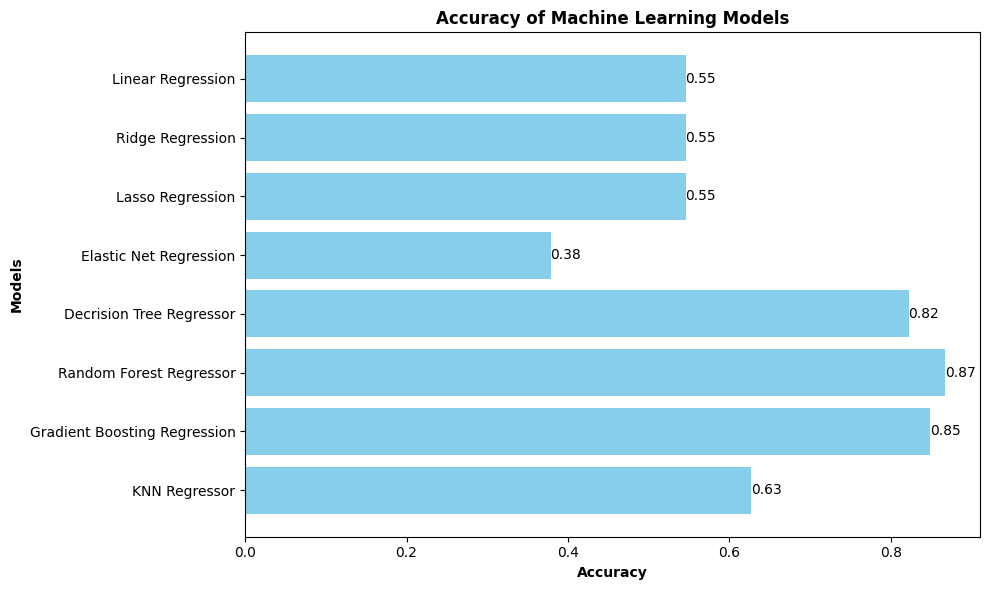

In [22]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bars = plt.barh(list(accuracy.keys()), list(accuracy.values()), color='skyblue')  # Use plt.barh for horizontal bars

# Adding annotations
for bar in bars:
    width = bar.get_width()  # Get the width of each bar
    plt.text(width, bar.get_y() + bar.get_height()/2, round(width, 2), ha='left', va='center')  # Position the text appropriately

plt.xlabel('Accuracy', fontweight='bold')
plt.ylabel('Models', fontweight='bold')
plt.title('Accuracy of Machine Learning Models', fontweight='bold')
plt.gca().invert_yaxis()  # Invert y-axis to display models from top to bottom
plt.tight_layout()
plt.show()

We can see that **`Random Forest Regressor`** has performed the best.

# **THANK YOU**
---